### Importing Libraries for Time Series forecasting ###
***


In [1]:
#Reading the data
import numpy as np
import pandas as pd
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#SARIMA modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

#Performance evaluation
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

#Warnings
import warnings
warnings.filterwarnings("ignore")
from DateTime import DateTime

### Reading the data ###
***
- For this first step, we are going to work with the data of several oil companies that are in the American stock market

In [2]:
df = pd.read_csv("/Users/me/Desktop/ML_ExxonMobile_Forecast/src/data/oil and gas stock prices.csv")


### Selection of Data ##
***
- Choosing only Exxon Mobile values 

In [3]:
df= df.loc[df.Symbol=="XOM"]


### Passing the information to DateTime ###
***


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

### Visualization of the Dataframe with all their variables ###
***

In [5]:
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD
5,2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400,USD
6,2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600,USD
7,2000-01-12,XOM,41.62,42.19,41.41,41.75,10314400,USD
8,2000-01-13,XOM,41.75,43.00,41.56,42.72,12056000,USD
9,2000-01-14,XOM,42.75,42.75,41.50,41.88,11268800,USD


In [6]:
df = df.set_index("Date")

### Getting the frequency to Daily ###
***
---

In [7]:
freq = pd.infer_freq(df.index)#infer frequency of the data
df.index.freq = freq#set frequency of the data
ts_resampled =df.asfreq('D')#resample the data to daily frequency
print(ts_resampled)#print the resampled data

           Symbol    Open    High     Low   Close      Volume Currency
Date                                                                  
2000-01-03    XOM   39.75   40.38   38.94   39.16  13458200.0      USD
2000-01-04    XOM   38.69   39.09   38.25   38.41  14510800.0      USD
2000-01-05    XOM   39.00   40.88   38.91   40.50  17485000.0      USD
2000-01-06    XOM   40.31   42.91   40.09   42.59  19462000.0      USD
2000-01-07    XOM   42.97   43.12   42.00   42.47  16603800.0      USD
...           ...     ...     ...     ...     ...         ...      ...
2022-06-06    XOM   99.18   99.78   98.67   98.84  20682050.0      USD
2022-06-07    XOM   99.70  103.43   99.49  103.37  36994384.0      USD
2022-06-08    XOM  103.49  105.57  102.98  104.59  31442508.0      USD
2022-06-09    XOM  103.42  104.57  102.16  102.33  26417288.0      USD
2022-06-10    XOM  101.94  103.35   99.79  100.46  30764130.0      USD

[8195 rows x 7 columns]


In [8]:
ts_resampled.head(10)

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400.0,USD
2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600.0,USD


### Interpolation
***
- Filling all the NAN values with the "Forward fill" function


In [9]:
ts_resampled = ts_resampled.fillna(method='ffill')


In [10]:
ts_resampled.head(15)

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-08,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-09,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400.0,USD
2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600.0,USD


In [11]:
df= ts_resampled.copy()

### Visualization of the Closing value on the Dataframe ###
***


<Axes: xlabel='Date'>

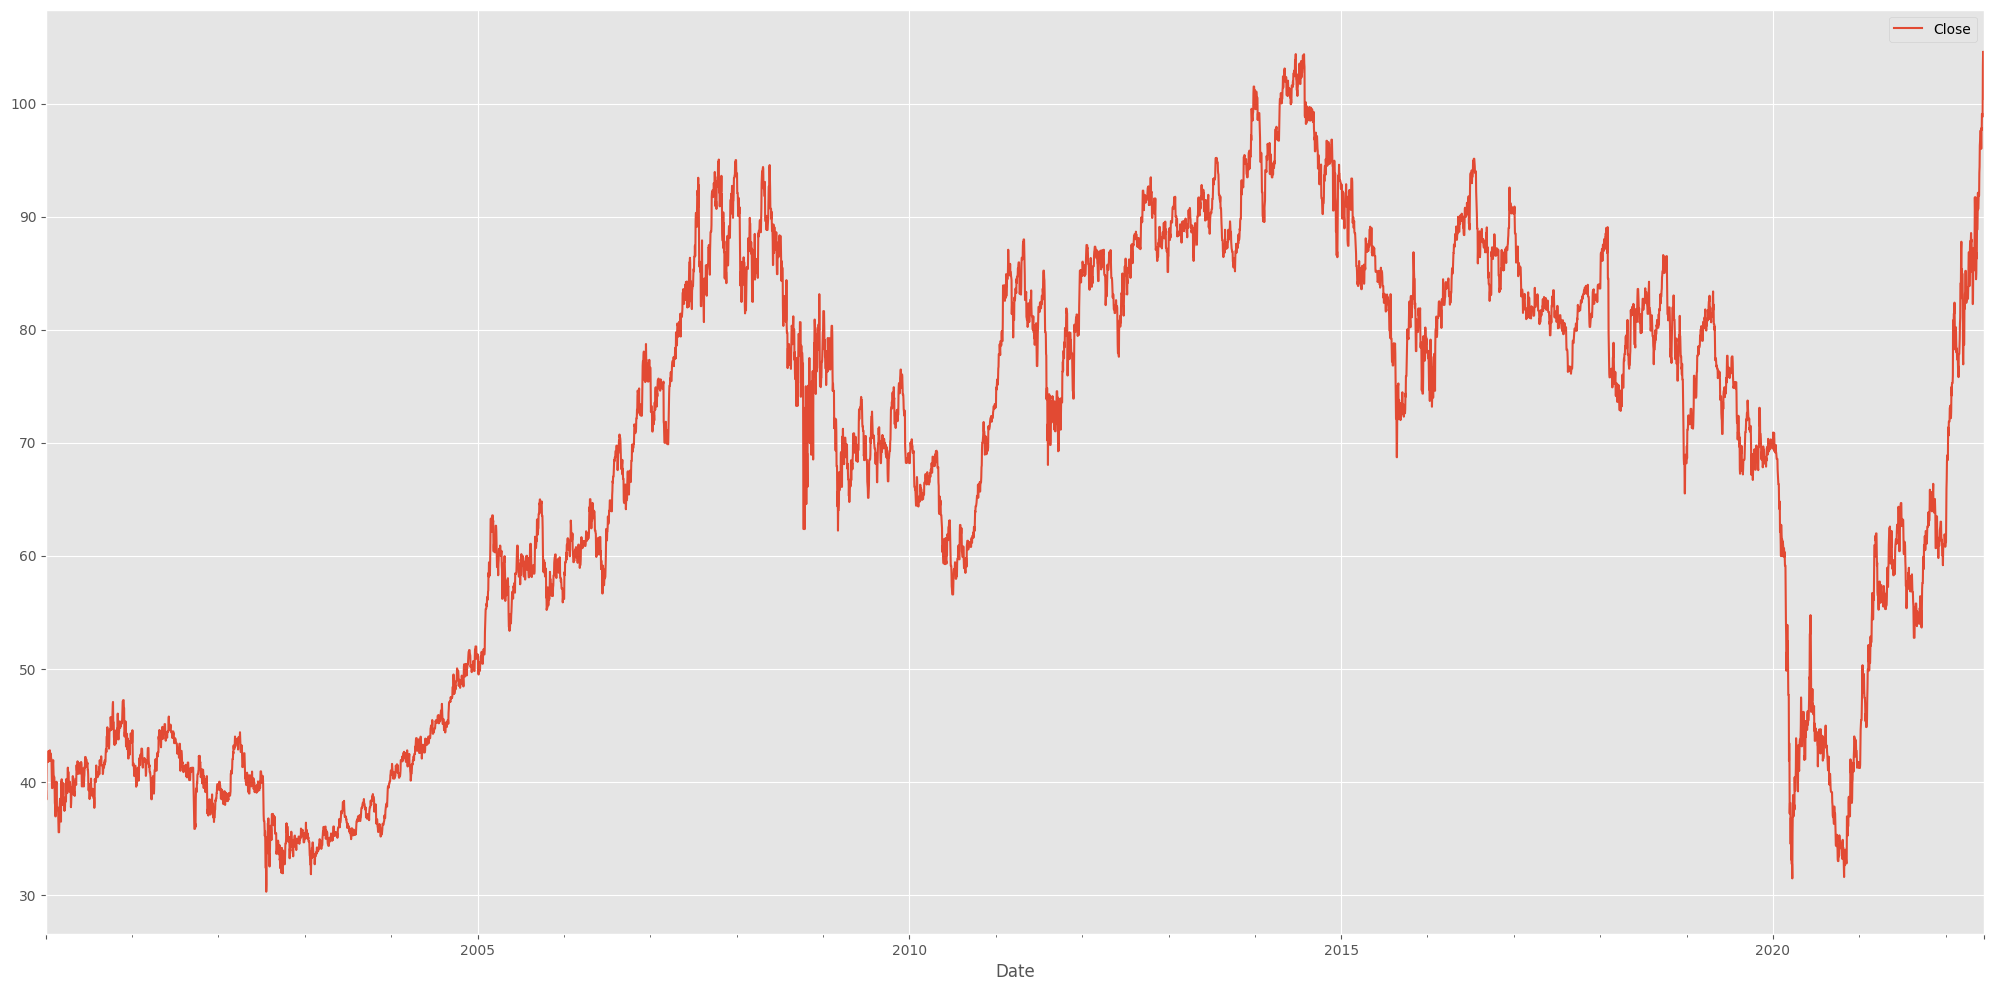

In [12]:
df["Close"].plot(figsize=(25,12),legend=True)

In [13]:
print('Time period start: {}\nTime period end: {}'.format(df.index.min(),df.index.max()))

Time period start: 2000-01-03 00:00:00
Time period end: 2022-06-10 00:00:00


### Renaming the Close to Value ###
***
---

In [14]:
df= df[["Close"]].copy()
df.rename(columns={"Close":"Value"},inplace=True)


# Feature engineering for Box-plots and data exploration
***

In [15]:
def feature_engineering(df):
    df['Date'] = df.index
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Dayofweek'] = df['Date'].dt.dayofweek
    return df

feature_engineering(df)

,Value,Date,Year,Month,Day,Dayofweek
Date,,,,,,
2000-01-03,39.16,2000-01-03,2000,1,3,0
2000-01-04,38.41,2000-01-04,2000,1,4,1
2000-01-05,40.50,2000-01-05,2000,1,5,2
2000-01-06,42.59,2000-01-06,2000,1,6,3
2000-01-07,42.47,2000-01-07,2000,1,7,4
...,...,...,...,...,...,...
2022-06-06,98.84,2022-06-06,2022,6,6,0
2022-06-07,103.37,2022-06-07,2022,6,7,1
2022-06-08,104.59,2022-06-08,2022,6,8,2


__Box and Whisker Plots:__
- Median values across years are not providing a lot of information
- Steady increase in the spread, or middle 50% of the data (boxes) over time
- A model considering seasonality might work well

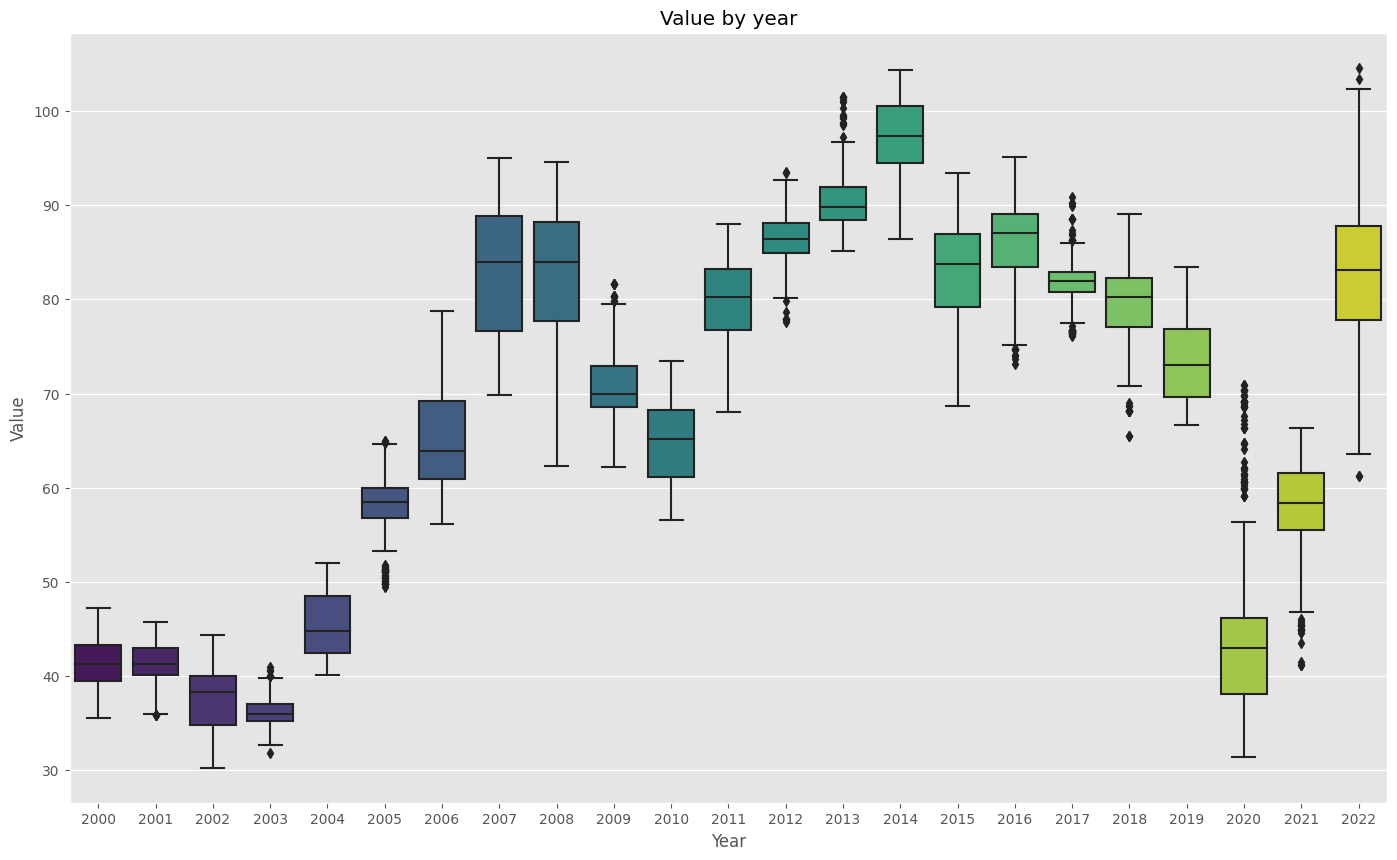

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="Year", y='Value', palette='viridis', ax=ax)
ax.set_title('Value by year')
plt.show()

__Decomposing using statsmodel:__
- We can use statsmodels to perform a decomposition of this time series. 
- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. 
- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

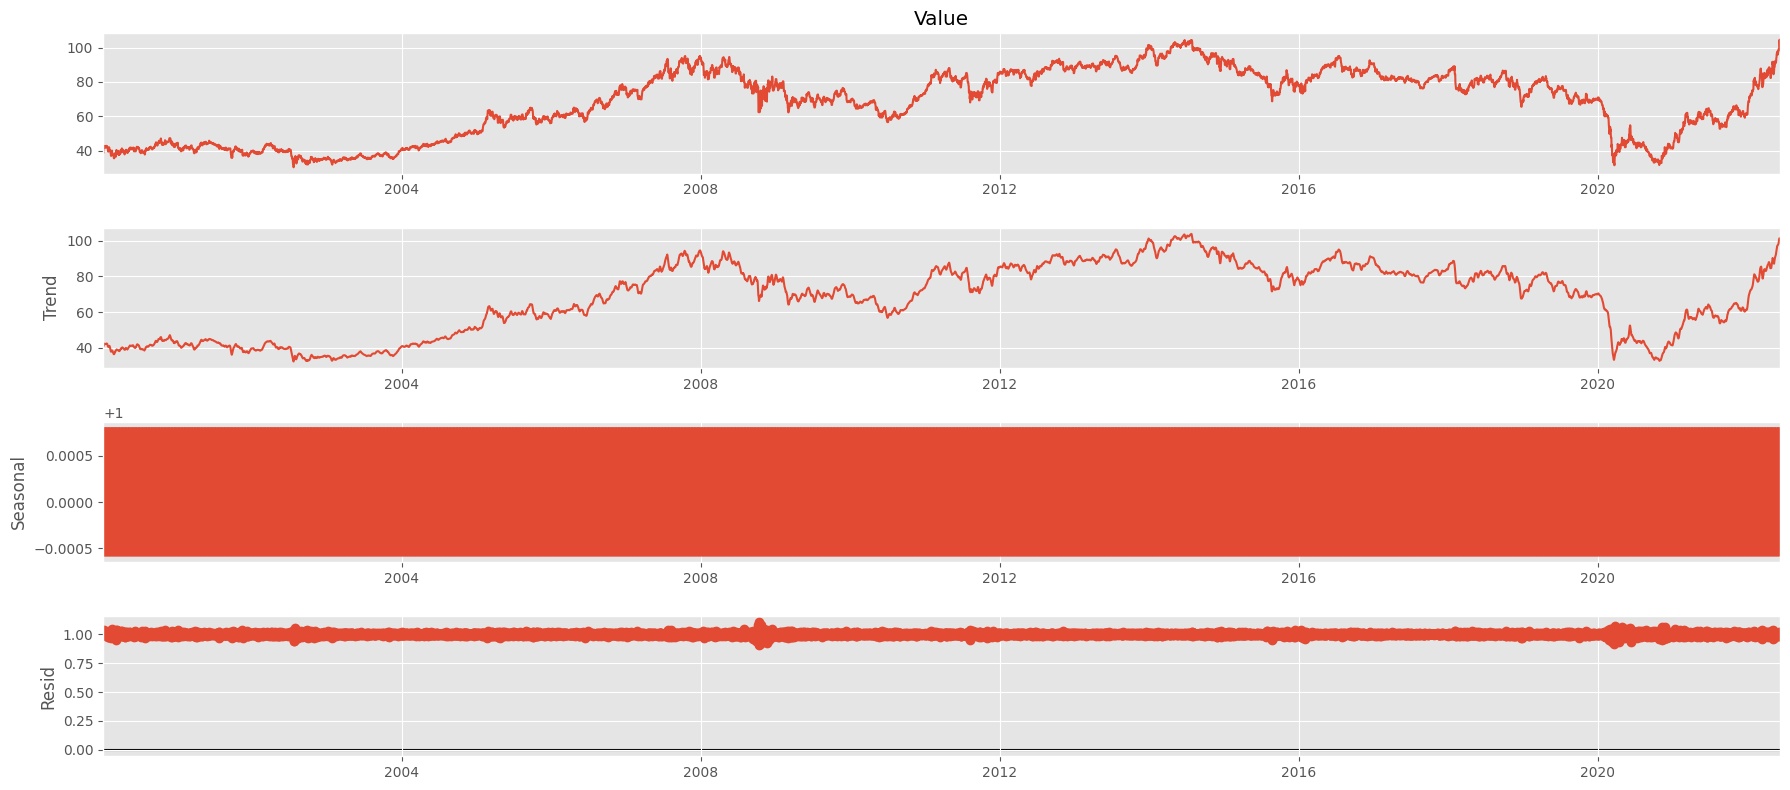

In [17]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df["Value"], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Stationarity
- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

***
---

__We can check stationarity using the following:__

- __ACF and PACF plots__: If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- __Plotting Rolling Statistics__: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- __Augmented Dickey-Fuller Test:__ This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

***
___

### ACF and PACF plots

- Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
- If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- This data is non-stationary as a high number of previous observations are correlated with future values.
- Confidence intervals are drawn as a cone. 
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

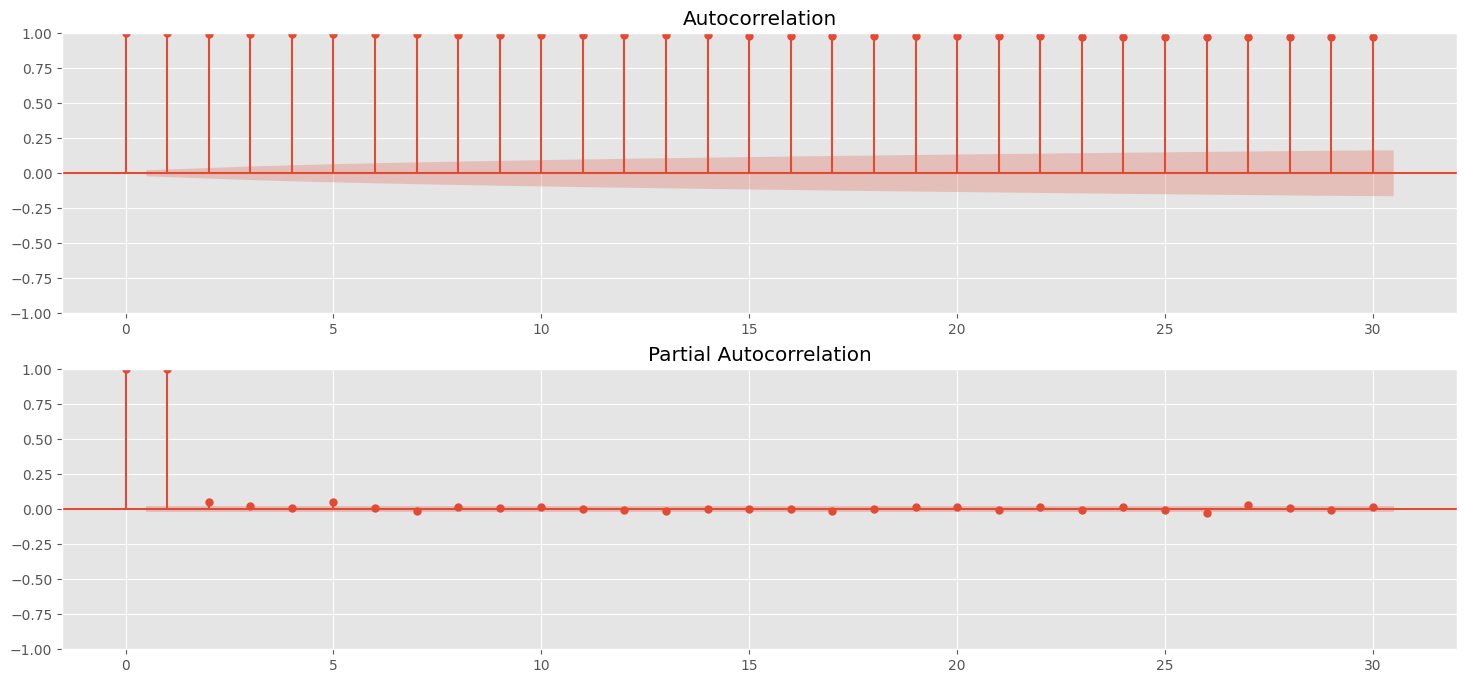

In [18]:
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(df["Value"], ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(df["Value"], ax=pyplot.gca(), lags = 30)
pyplot.show()

In [19]:
df= df[["Value"]].copy()

__Reviewing plots of the density of observations can provide further insight into the structure of the data:__
- The distribution is not perfectly Gaussian (normal distribution).
- The distribution is right shifted.
- Transformations might be useful prior to modelling.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8195 entries, 2000-01-03 to 2022-06-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   8195 non-null   float64
dtypes: float64(1)
memory usage: 128.0 KB


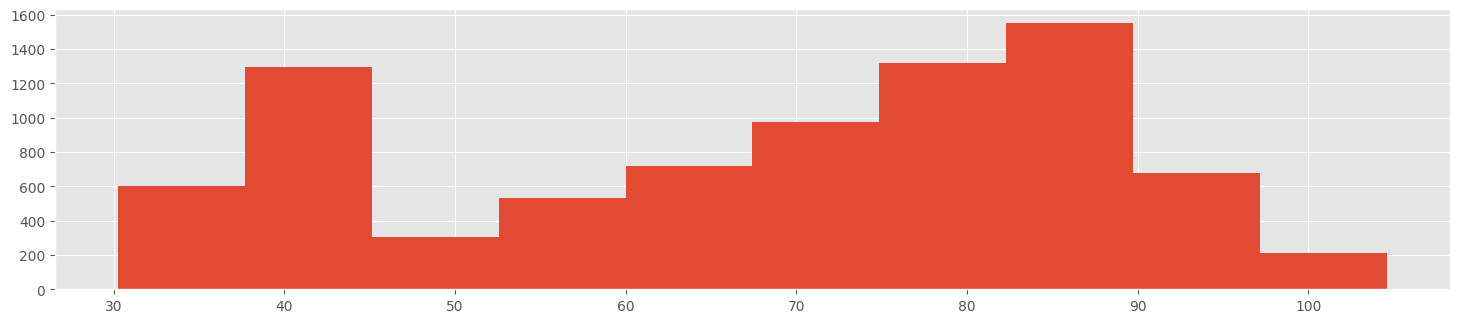

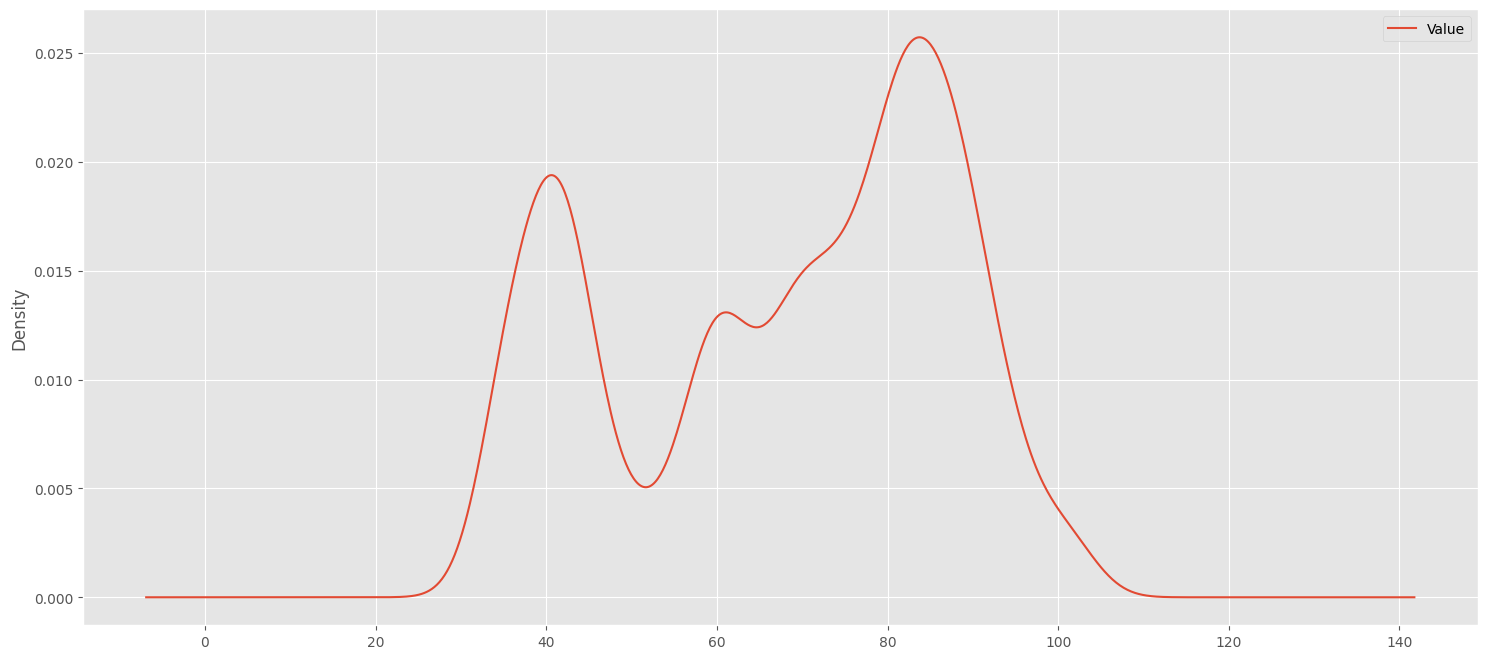

,Value
count,8195.000000
mean,67.955834
std,19.417915
min,30.270000
25%,48.260000
50%,72.130000
75%,84.025000
max,104.590000


In [21]:
from matplotlib import pyplot

pyplot.figure(1)
pyplot.subplot(211)
df.Value.hist()
df.plot(kind='kde')
pyplot.show()
df.describe()

### Rolling Mean & Dickey-Fuller test ###
***
- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

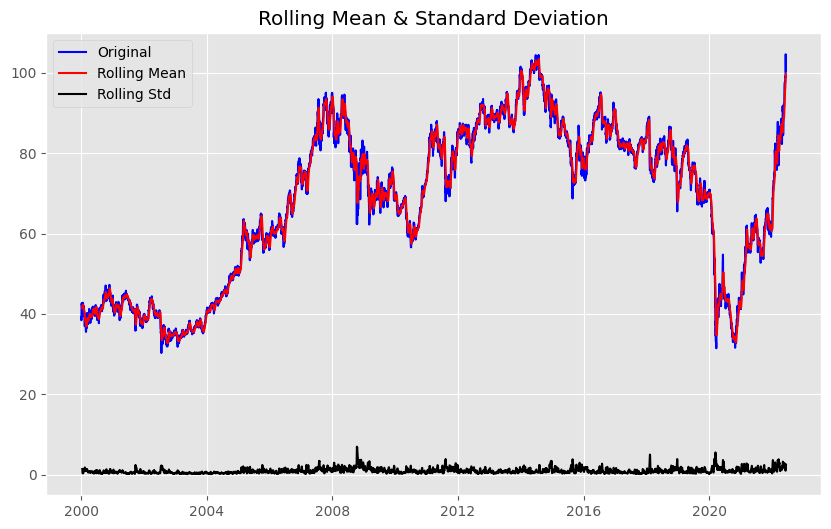

ADF Statistic: -1.5758026693553016
p-value: 0.49573618189725904
Critical Values: {'1%': -3.431149187783793, '5%': -2.861893184836333, '10%': -2.5669579955025976}
The data is non-stationary


In [22]:
# Define a function to test for stationarity
def test_stationarity(data):
    # Calculate the rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot the rolling statistics
    plt.figure(figsize=(10,6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(data)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])
    
    if adf_result[0] < adf_result[4]['5%']:
        print('The data is stationary')
    else:
        print('The data is non-stationary')
    
# Call the function to test for stationarity
test_stationarity(df)


In [23]:
def Prueba_Dickey_Fuller(series):
    
    print (f"Resultados de la prueba de Dickey-Fuller")
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        StopIteration

In [24]:
Prueba_Dickey_Fuller(df)

Resultados de la prueba de Dickey-Fuller
Test Statistic                          -1.575803
p-value                                  0.495736
No Lags Used                             9.000000
Número de observaciones utilizadas    8185.000000
Critical Value (1%)                     -3.431149
Critical Value (5%)                     -2.861893
Critical Value (10%)                    -2.566958
dtype: float64


## Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time. F
2. __Seasonality__ – variations at specific time-frames. 

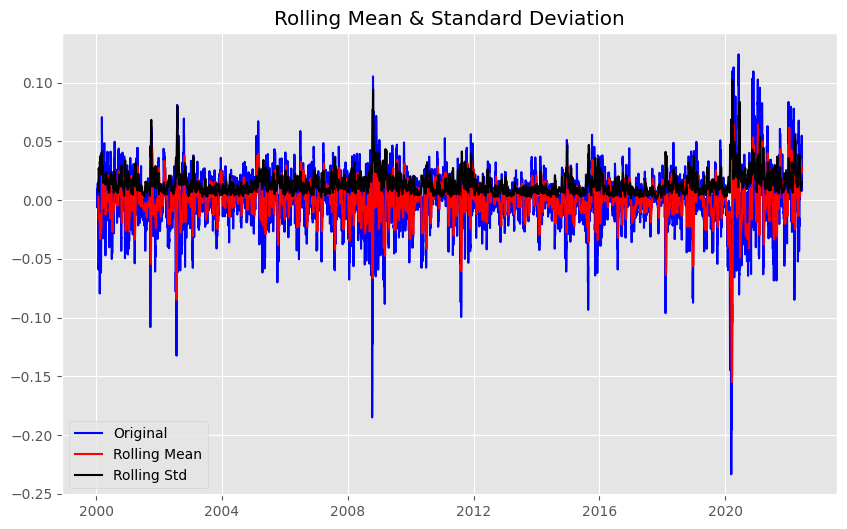

ADF Statistic: -16.386032555597318
p-value: 2.722539232759746e-29
Critical Values: {'1%': -3.431151833636392, '5%': -2.8618943539594732, '10%': -2.5669586178382677}
The data is stationary


In [25]:
# Apply log transformation to the data
df_log = np.log(df)

# Calculate the moving average and standard deviation
moving_avg = df_log.rolling(window=12).mean()

# Subtract the moving average from the data
df_log_minus_moving_avg = df_log - moving_avg

# Drop the null values
df_log_minus_moving_avg.dropna(inplace=True)

# Test for stationarity
test_stationarity(df_log_minus_moving_avg)


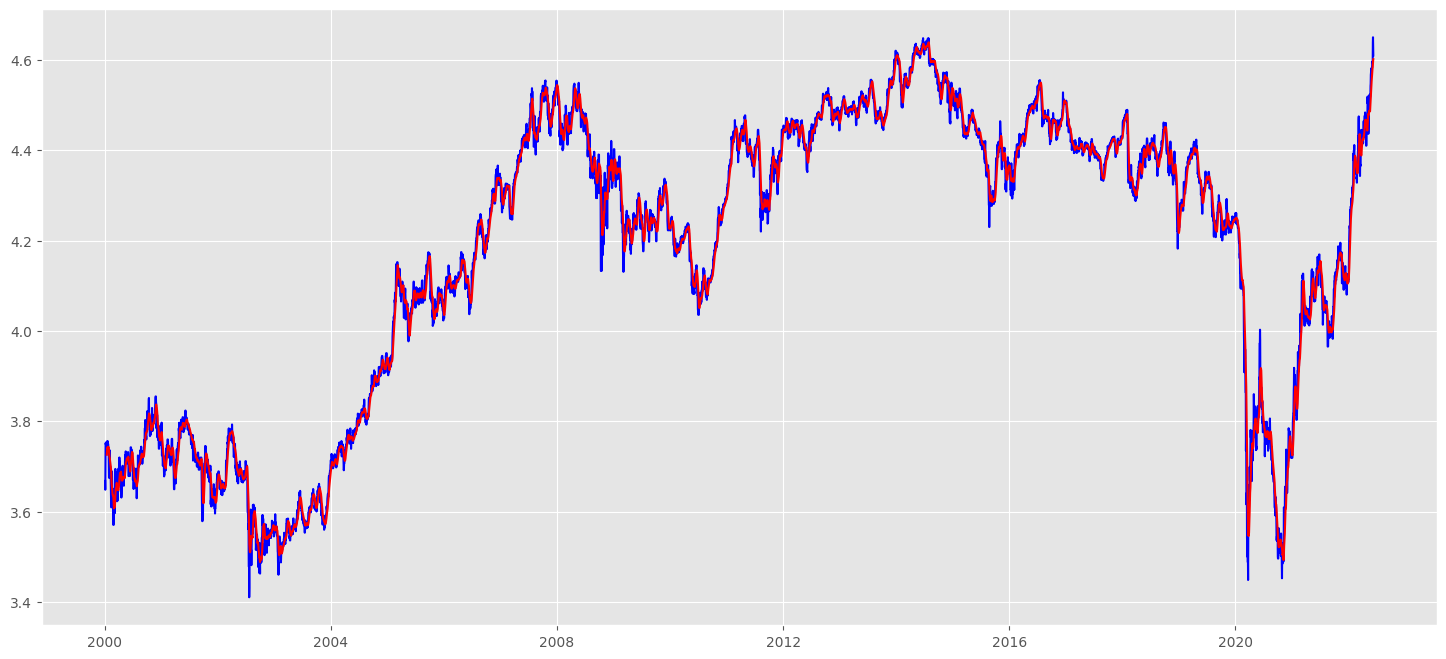

In [26]:

plt.plot(df_log, color='blue')
plt.plot(moving_avg, color='red')

In [27]:
df_log_minus_moving_avg

,Value
Date,
2000-01-14,0.009063
2000-01-15,0.003467
2000-01-16,-0.003740
2000-01-17,-0.006533
2000-01-18,0.005748
...,...
2022-06-06,0.009756
2022-06-07,0.048958
2022-06-08,0.054919


In [28]:
#df = pd.DataFrame(df_log_minus_moving_avg.copy())

In [29]:
df.head()

,Value
Date,
2000-01-03,39.16
2000-01-04,38.41
2000-01-05,40.50
2000-01-06,42.59
2000-01-07,42.47


In [30]:
Prueba_Dickey_Fuller(df)

Resultados de la prueba de Dickey-Fuller
Test Statistic                          -1.575803
p-value                                  0.495736
No Lags Used                             9.000000
Número de observaciones utilizadas    8185.000000
Critical Value (1%)                     -3.431149
Critical Value (5%)                     -2.861893
Critical Value (10%)                    -2.566958
dtype: float64


In [31]:
freq = pd.infer_freq(df.index)

print(freq)

D


### Train & test ###
***


In [32]:
df.head()

,Value
Date,
2000-01-03,39.16
2000-01-04,38.41
2000-01-05,40.50
2000-01-06,42.59
2000-01-07,42.47


In [33]:
train_data = df[:6552]
test_data = df[6552:]



In [34]:
test_data.head()

,Value
Date,
2017-12-11,83.03
2017-12-12,82.76
2017-12-13,83.12
2017-12-14,82.90
2017-12-15,83.03


In [35]:
from pmdarima import auto_arima   



In [36]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20720.933, Time=0.39 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=19011.270, Time=2.60 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=13.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20681.014, Time=0.35 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18197.811, Time=5.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=77.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=29.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=18247.732, Time=3.48 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=18192.885, Time=7.02 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=19004.191, Time=3.14 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=110.07 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=46.58 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=18194.866, Time=6.64 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=18191.109, Time=10.65 sec
 ARIMA(2,1,1)(1,1,0)[12]    

In [43]:
print(modelo_auto.aic())


18189.66727024953


In [44]:
print(modelo_auto.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 6552
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -9089.834
Date:                             Mon, 15 May 2023   AIC                          18189.667
Time:                                     22:16:53   BIC                          18223.595
Sample:                                 01-03-2000   HQIC                         18201.398
                                      - 12-10-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342      0.052      8.286      0.000       0.331       0.537
ma.L1         -0.5222      

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(train_data, order = (1,1,1), seasonal_order = (2,1,0,12)) 
arima_result = arima_model.fit(disp=False) 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Value   No. Observations:                 6552
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -9089.834
Date:                             Mon, 15 May 2023   AIC                          18189.667
Time:                                     22:13:43   BIC                          18223.595
Sample:                                 01-03-2000   HQIC                         18201.398
                                      - 12-10-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342      0.052      8.286      0.000       0.331       0.537
ma.L1         -0.5222      0.051    -10.210      0.000      -0.622      -0.422
ar.S.L12      -0.6371      0.006   -103.461      0.000      -0.649      -0.625
ar.S.L24      -0.3428      0.006    -56.337      0.000      -0.355      -0.331
sigma2         0.9431      0.008    124.270      0.000       0.928       0.958
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             20208.30
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

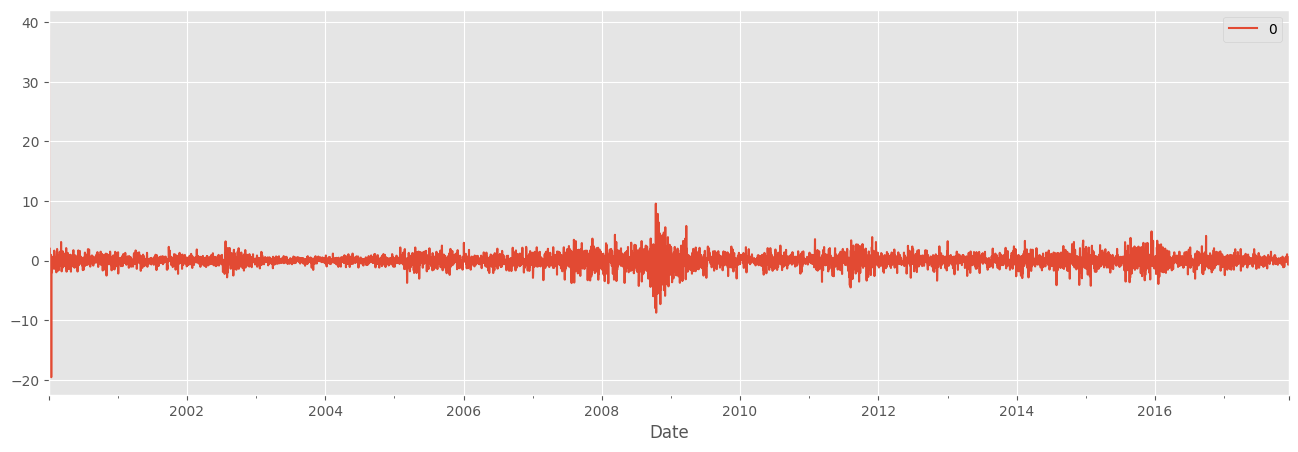

In [40]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

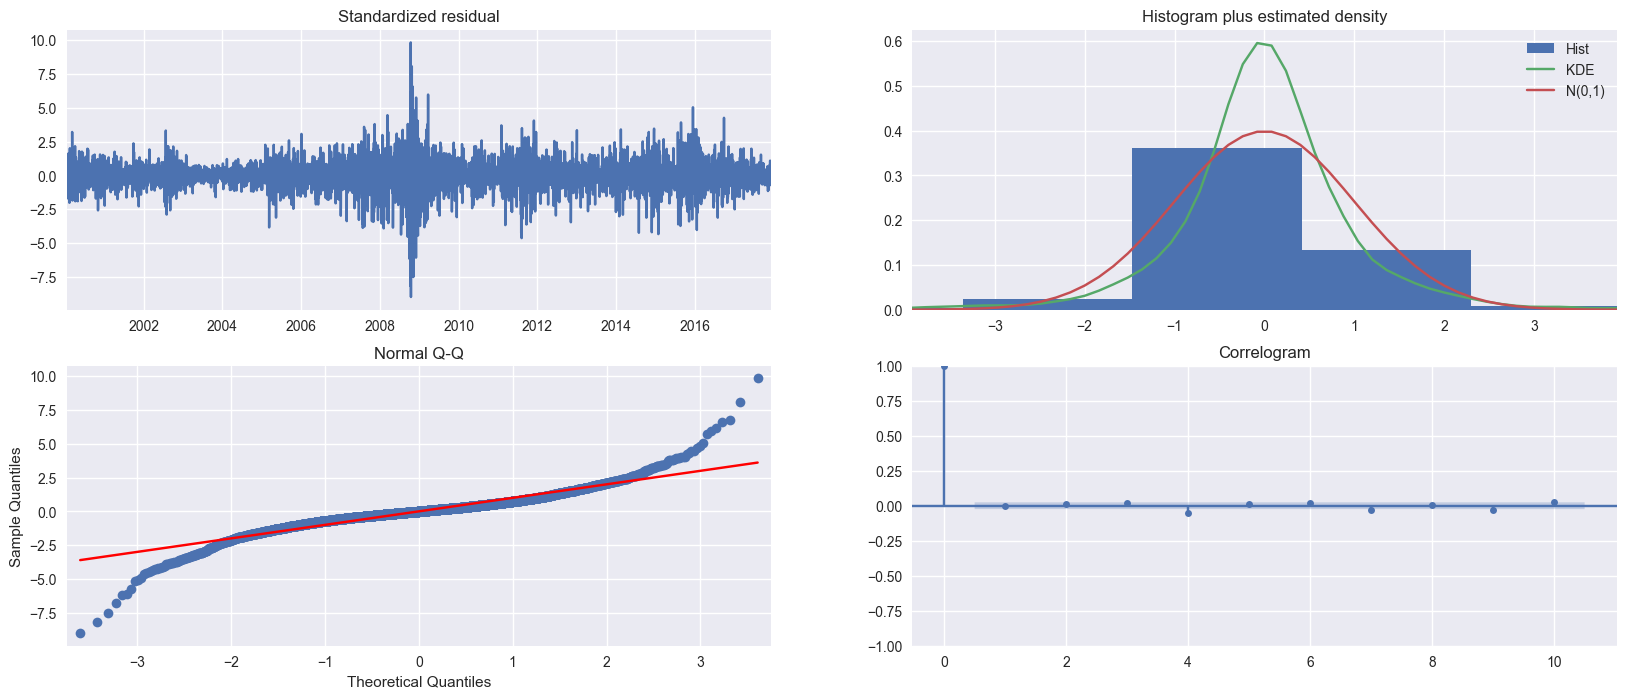

In [41]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [ ]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [47]:
predictions = arima_model.predict(1)
print("mean_squared_error:", mean_squared_error(test_data, predictions))

NotImplementedError: 

In [48]:
evaluacion_metrica(test_data,predictions)


NameError: name 'evaluacion_metrica' is not defined

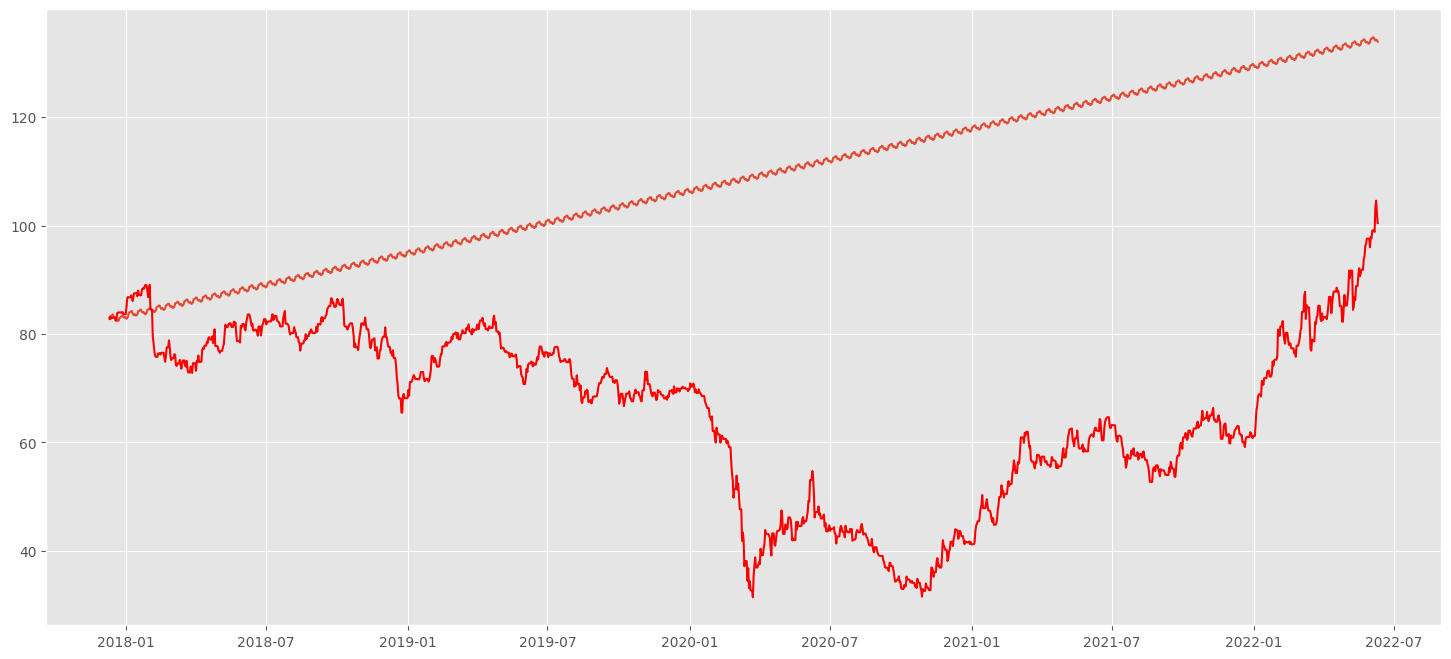

In [95]:
plt.plot(predictionss)
plt.plot(test_data)